# 2. Oczyszczanie danych

Trzy popularne rozwiązania ,,walki" z wartościami brakującymi:
- usunięcie wierszy z wybrakowanymi wartościami,
- usunięcie całego atrybutu z wartościami wybrakowanymi,
- uzupełnienie wybranych wartości wybraną strategią.

W praktyce można spotkać się z intyicyjnymi podejściami, które polegają na usuwaniu wierszy z brakującymi wartościami w przypadku ich niewielkiej liczebności, np. do ok. 0.1% oryginalnego zbioru danych. Podejście na usunięciu całego atrybutu sprawdza się gdy znaczna częśc wartości atrybutu jest wybrakowana. W pozostałych przypadkach najlepiej powinno sprawdzić się uzupełnianie wartości według obranej strategii. Wśród najbardziej typowych strategii uzupełniania wartości wybrakowanych warto wymienić następujące:
- średnia arytmetyczna lub mediana (dla wartości rzeczywistych),
- dominanta (dla danych kategorialnych).

## Oczyszczanie danych na podstawie funkcjonalności biblioteki pandas

In [1]:
import pandas as pd  
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)['frame']

In [3]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


Metoda *isnull* wywołana na obiekcie klasy Series zwróci serię wartości logicznych odpowiadających temu czy dana wartośc w kolumnie jest wybrakowana.

In [4]:
data['MedInc']
data['MedInc'].isnull() #or isna()

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: MedInc, Length: 20640, dtype: bool

Za pomocą metody *any* wywołanej na powstałej w ten sposób ramce można sprawdzić czy występuje tam przynajmniej jedna wartość prawdziwa. Metoda all umożliwia sprawdzenie czy w ramce występują tylko i wyłącznie wartości prawdziwe.

In [5]:
data['MedInc'].isnull().any()

False

Za pomocą odwołania się do osi kolumn (parametr *axis=0* w metodzie *any*) można z łatwością sprawdzić w których kolumnach występują wartości wybrakowane.

In [6]:
data.isnull().any(axis=0)

MedInc         False
HouseAge       False
AveRooms       False
AveBedrms      False
Population     False
AveOccup       False
Latitude       False
Longitude      False
MedHouseVal    False
dtype: bool

In [7]:
data.isna().any().any()

False

In [8]:
# przykladowy kod usuwajacy kilka wartosci metoda chybil-trafil
from random import randint

# minimalny i maksymalny odsetek komorek do usuniecia wartosci
min_percent, max_percent = 0.001, 0.003

# wyznacza pseudolosowo od 0.1 do 0.3% komórek z ramki danych
cells_to_remove = randint(int(data.size * min_percent), int(data.size * max_percent))

# pseudolosowy wybor indeksow wierszy i kolumn
for _ in range(cells_to_remove):
  row_idx = randint(0, data.shape[0] - 1)  # pseudolosowy indeks wiersza
  col_idx = randint(0, data.shape[1] - 1)  # pseudolosowy indeks kolumny

  # usuniecie pseudolosowo wskazanej komorki
  data.iat[row_idx, col_idx] = None

In [9]:
data.isnull().any(axis=0)

MedInc         True
HouseAge       True
AveRooms       True
AveBedrms      True
Population     True
AveOccup       True
Latitude       True
Longitude      True
MedHouseVal    True
dtype: bool

In [10]:
data['MedInc'].isna().any()
data['MedInc'].isna().sum()

35

In [11]:
data.isna().sum()

MedInc         35
HouseAge       49
AveRooms       56
AveBedrms      54
Population     30
AveOccup       52
Latitude       41
Longitude      38
MedHouseVal    39
dtype: int64

Jeżeli w kolumnie występują wartości wybrakowane, można je uzupełnić wskazaną wartością.

In [ ]:
data['MedInc'].fillna(0)

Aby umieścić wartości wybrakowane w oryginalnej ramce danych należy użyć metody *fillna* na obiekcie klasy DataFrame przekazując jako parametr słownik mapujący nazwy kolumn na wartości, którymi mają zostać zastąpione wartości wybrakowane.

In [ ]:
data.fillna({
    'Longitude': 0,
    'Latitude': 100,
})

Biblioteka pandas dostarcza metod wyznaczających podstawowe (i bardziej zaawansowane) statystyki. Na szczególną uwagę zasługują metody *mean()* i *median()*, które zwracają odpowiednio średnią arytmetyczną i medianę wartości ze wskazanego atrybutu.

In [12]:
data['MedHouseVal'].mean()

2.0688136308917047

In [13]:
data['MedHouseVal'].median()

1.798

W przypadku wyznaczania dominanty zastosowanie znajduje metoda *mode()*. Należy jednak pamiętać, że dominantą nie zawsze musi być tylko jedna wartość.

In [14]:
data['Population'].mode().iloc[0]

891.0

In [15]:
data['HouseAge'].mode()

0    52.0
Name: HouseAge, dtype: float64

In [16]:
data['HouseAge'].mode().iloc[0]

52.0

## Oczyszczanie danych z biblioteką Scikit-learn

Oprócz biblioteki *pandas*, biblioteka *Scikit-learn* zawiera także obszerny zestaw narzędzi do pracy z oczyszczaniem danych, w szczególności z uzupełnianiem danych wybrakowanych. Przeznaczona do tego celu klasa *SimpleImputer* przyjmuje w inicjalizatorze parametr *strategy*, w którym należy wskazać metodę uzupełniania brakujących wartości:
- mean,
- median
- most_frequent,
- constant.

In [17]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

Przed właściwym uzupełnieniem wartości należy najpierw wybrać zestaw pasujących atrybutów, dla których zostanie zastosowana wybrana strategia.

In [18]:
num_attributes = data.select_dtypes(include=['number'])

In [19]:
num_attributes

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [20]:
num_attributes.isnull().any(axis=0)

MedInc         True
HouseAge       True
AveRooms       True
AveBedrms      True
Population     True
AveOccup       True
Latitude       True
Longitude      True
MedHouseVal    True
dtype: bool

Wywołanie metody *fit* na utworzonym obiekcie pozwoli na automatyczne wyznaczenie wartości do uzupełnienia w każdym z atrybutów.

In [21]:
imputer.fit(num_attributes)

SimpleImputer()

W atrybucie *statistics_* zawarte są wyznaczone wartości do zastąpenia brakujących według obranej strategii.

In [22]:
imputer.statistics_

array([ 3.87076995e+00,  2.86379972e+01,  5.42732970e+00,  1.09669769e+00,
        1.42552484e+03,  3.07126496e+00,  3.56322050e+01, -1.19569757e+02,
        2.06881363e+00])

Do zastąpienia brakujących wartości przeznaczona jest metoda *transform*.

In [23]:
new_num_attributes = imputer.transform(num_attributes)
new_num_attributes

array([[   8.3252    ,   41.        ,    6.98412698, ...,   37.88      ,
        -122.23      ,    4.526     ],
       [   8.3014    ,   21.        ,    6.23813708, ...,   37.86      ,
        -122.22      ,    3.585     ],
       [   7.2574    ,   52.        ,    8.28813559, ...,   37.85      ,
        -122.24      ,    3.521     ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,   39.43      ,
        -121.22      ,    0.923     ],
       [   1.8672    ,   18.        ,    5.32951289, ...,   39.43      ,
        -121.32      ,    0.847     ],
       [   2.3886    ,   16.        ,    5.25471698, ...,   39.37      ,
        -121.24      ,    0.894     ]])

In [24]:
# zmiana array na obiekt pandas DF
new_num_attributes = pd.DataFrame(new_num_attributes, columns=data.columns)

In [25]:
new_num_attributes

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [26]:
new_num_attributes.isnull().any(axis=0)

MedInc         False
HouseAge       False
AveRooms       False
AveBedrms      False
Population     False
AveOccup       False
Latitude       False
Longitude      False
MedHouseVal    False
dtype: bool

In [27]:
new_num_attributes.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [29]:
const_imputer = SimpleImputer(strategy='constant', fill_value=0)

In [30]:
new_num_attributes = const_imputer.fit_transform(new_num_attributes)

In [31]:
new_num_attributes = pd.DataFrame(new_num_attributes, columns=data.columns)
new_num_attributes

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


Wykorzystywane są dwie niezależne metody: *fit* oraz *transform*. Wywołanie metody fit oznacza dopasowanie do aktualnie przekazanej ramki danych i wyznaczenie na jej podstawie wartości do uzupełnienia. Analogicznie wygląda sytuacja dla przekazanego atrybutu. Wywołanie metody *transform* spowoduje faktyczne uzupełnienie brakujących wartości i zwrócenie utworzonego w ten sposób nowego obiektu będącego pełną ramką danych. Warto więc mieć na uwadze, że próba wywołania metody *transform* po wywołaniu metody *fit* na innym zbiorze danych może kompletnie mijać się z celem.

## Symetria wartości numerycznych

W pewnych przypadkach histogramy atrybutów numerycznych potrafią być asymetryczne.

<Axes: >

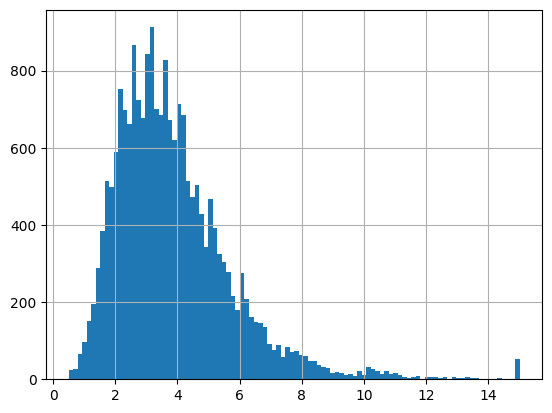

In [32]:
new_num_attributes['MedInc'].hist(bins=100)

Powyższy histogram jest prawoskośny, co oznacza że jego asymetria jest spowodowana nasileniem występowania wartości występujących po lewej stronie histogramu. Analogicznie wygląda sytuacja w przypadku lewoskośności. Rozwiązaniem tego problemu może być zastosowanie skali logarytmicznej lub pierwiastkowej.

In [33]:
import numpy as np

<Axes: >

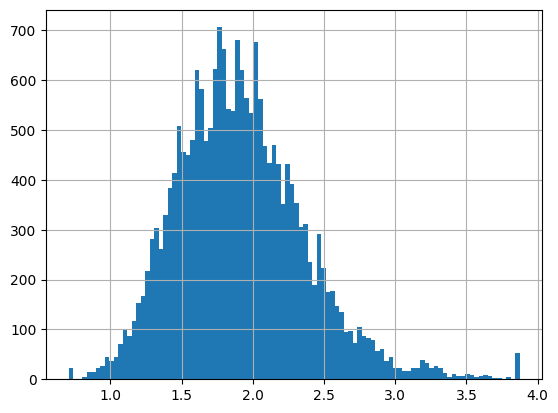

In [34]:
np.sqrt(new_num_attributes['MedInc']).hist(bins=100)

<Axes: >

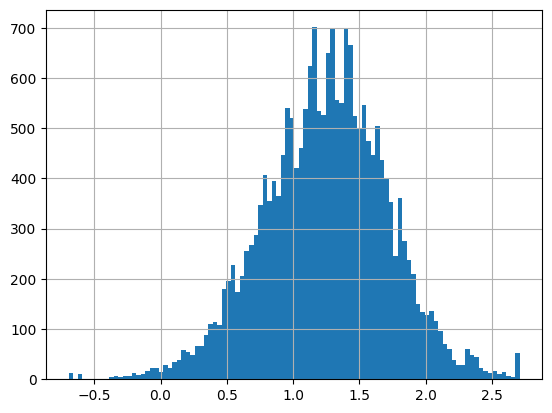

In [35]:
np.log(data['MedInc']).hist(bins=100)